In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Preprocessed_Telco_Churn.csv")
print("Dataset Loaded:", df.shape)
df.head()

Dataset Loaded: (7043, 26)


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Column1,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,-1.277445,0,No phone service,No,Yes,No,...,0,NaN,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0.066327,1,No,Yes,No,Yes,...,0,NaN,True,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,-1.236724,1,No,Yes,Yes,No,...,1,NaN,True,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0.514251,0,No phone service,Yes,No,Yes,...,0,NaN,True,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,-1.236724,1,No,No,No,No,...,1,NaN,False,True,False,False,False,False,True,False


In [9]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Encode all categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("All categorical columns encoded successfully!")


All categorical columns encoded successfully!


In [10]:
# Define features (x) and target (y)
x = df.drop(columns=['Churn', 'customerID'], errors='ignore')
y = df['Churn']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Data split complete:")
print("Training set:", x_train.shape)
print("Test set:", x_test.shape)


Data split complete:
Training set: (5634, 24)
Test set: (1409, 24)


In [15]:
#Ensure all feature data is numeric
x_train = x_train.select_dtypes(include=['number'])
x_test = x_test.select_dtypes(include=['number'])

#Fill any missing values in both train and test sets
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)

#Train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

#Predict on test data
y_pred = model.predict(x_test)

print("Model trained and predictions generated successfully!")


Model trained and predictions generated successfully!


Model Accuracy: {acc*100:.2f}%

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



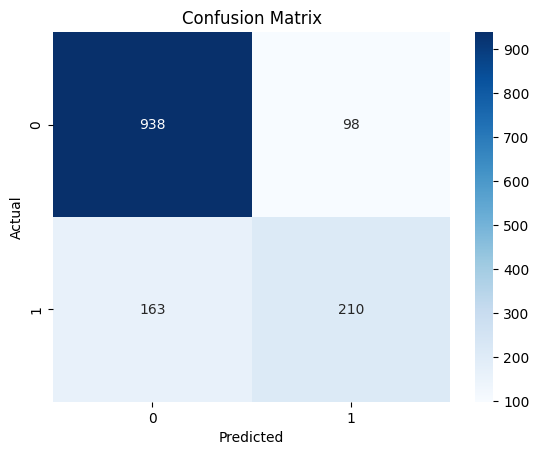

In [17]:
# Evaluate model
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy: {acc*100:.2f}%\n")

# Classification report
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
